In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

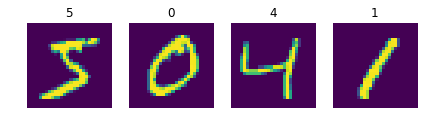

In [97]:
fig, axes = plt.subplots(1, 4, figsize=(7,3))
for img, label, ax in zip(x_train[0:4], y_train[0:4], axes):
  ax.set_title(label)
  ax.imshow(img)
  ax.axis('off')
plt.show()

In [98]:
print(f'train images: {x_train.shape}')
print(f'train labels: {y_train.shape}')
print(f'test images: {x_test.shape}')
print(f'test labels: {y_test.shape}')

train images: (60000, 28, 28)
train labels: (60000,)
test images: (10000, 28, 28)
test labels: (10000,)


In [0]:
x_train_reshaped = x_train.reshape(60000, 28*28) / 255
x_test_reshaped = x_test.reshape(10000, 28*28) / 255

In [0]:
from keras.utils import to_categorical
y_train_reshaped = to_categorical(y_train)
y_test_reshaped = to_categorical(y_test)

In [0]:
learning_rate = 0.01
epochs = 20
batch_size = 100
batches = int(x_train.shape[0] / batch_size)

In [0]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(np.random.randn(784, 10).astype(np.float32))
B = tf.Variable(np.random.randn(10).astype(np.float32))

In [0]:
logits = tf.nn.softmax(tf.add(tf.matmul(X, W), B))

loss_op = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(pred), axis =1))
# loss_op = tf.losses.softmax_cross_entropy(Y, pred)

confusion_op = tf.math.confusion_matrix(tf.argmax(Y, 1), tf.argmax(logits, 1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_op)

In [0]:
session = tf.Session()
session.run(tf.global_variables_initializer())

In [107]:
# Training
for epoch in range(epochs):
    
  for i in range(batches):
     
    offset = i*epoch
    x = x_train_reshaped[offset: offset + batch_size]
    y = y_train_reshaped[offset: offset + batch_size]
      
    session.run(optimizer, feed_dict={X: x, Y: y})
      
    loss = session.run(loss_op, feed_dict={X: x, Y: y})
      
  if not epoch % 1:
    print(f'epoch:{epoch} loss:{loss:.4f}')

epoch:0 loss:2.8237
epoch:1 loss:3.9478
epoch:2 loss:2.7480
epoch:3 loss:1.9601
epoch:4 loss:1.8532
epoch:5 loss:2.1777
epoch:6 loss:1.7481
epoch:7 loss:1.8090
epoch:8 loss:2.6079
epoch:9 loss:0.8420
epoch:10 loss:0.3866
epoch:11 loss:1.0633
epoch:12 loss:1.9786
epoch:13 loss:1.6241
epoch:14 loss:1.3618
epoch:15 loss:0.5925
epoch:16 loss:1.0710
epoch:17 loss:1.4396
epoch:18 loss:0.6295
epoch:19 loss:0.9432


In [109]:
confusion = session.run(confusion_op, feed_dict={X: x_test_reshaped, Y: y_test_reshaped})
print(confusion)

[[ 902    0    7    4    0   25   20    3   16    3]
 [   0 1059   15   14    3    5    5    1   33    0]
 [  18   26  815   29   25    8   23   17   63    8]
 [  24    9   37  766    2   89    9   23   34   17]
 [   6    5   15   14  805    8   21   13   23   72]
 [  29    6   16   71   17  616   22   21   78   16]
 [  21    6   32    4   36   25  819    0   13    2]
 [   6   17   36   34   15    5    3  841   16   55]
 [  25   19   29   64   13   63   14   14  699   34]
 [  14    5   12   22  109   20    7   69   29  722]]


In [0]:
# Testing
yhat = session.run(logits, feed_dict={X: x_test_reshaped})
yhat = np.argmax(yhat, axis=1)
y = np.argmax(y_test_reshaped, axis=1)

In [114]:
# confusion matrix menggunakan tensorflow
confusion = tf.confusion_matrix(y, yhat)
print(confusion.eval(session=session))

[[ 902    0    7    4    0   25   20    3   16    3]
 [   0 1059   15   14    3    5    5    1   33    0]
 [  18   26  815   29   25    8   23   17   63    8]
 [  24    9   37  766    2   89    9   23   34   17]
 [   6    5   15   14  805    8   21   13   23   72]
 [  29    6   16   71   17  616   22   21   78   16]
 [  21    6   32    4   36   25  819    0   13    2]
 [   6   17   36   34   15    5    3  841   16   55]
 [  25   19   29   64   13   63   14   14  699   34]
 [  14    5   12   22  109   20    7   69   29  722]]


In [115]:
from sklearn.metrics import classification_report
print(classification_report(y, yhat))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       980
           1       0.92      0.93      0.93      1135
           2       0.80      0.79      0.80      1032
           3       0.75      0.76      0.75      1010
           4       0.79      0.82      0.80       982
           5       0.71      0.69      0.70       892
           6       0.87      0.85      0.86       958
           7       0.84      0.82      0.83      1028
           8       0.70      0.72      0.71       974
           9       0.78      0.72      0.75      1009

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



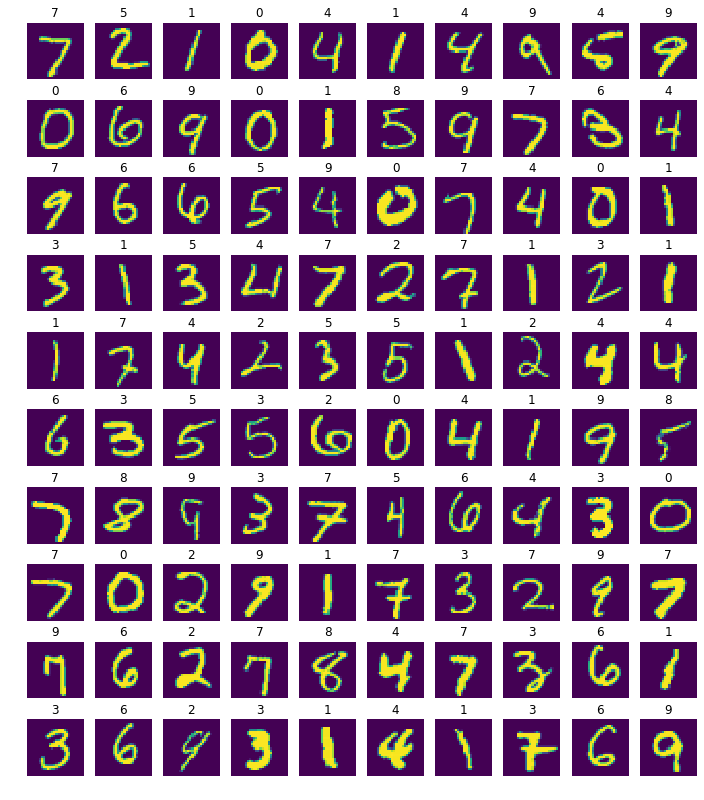

In [116]:
fig, axes = plt.subplots(10, 10, figsize=(12,14))
for img, label, ax in zip(x_test[0:100], yhat[0:100], axes.flat):
  ax.set_title(label)
  ax.imshow(img.reshape(28,28))
  ax.axis('off')
plt.show()

In [0]:
session.close()